# Time Series Datasets

## Introduction

In this tutorial, we'll look at some of the univariate datasets commonly utilized by the research community to develop and benchmark time series modeling methods. The primary aim of this tutorial is to familiarize you with the types of time series data and their properties. This notebook serves as an introductory exploration, setting the stage for more detailed analyses in subsequent tutorials that cover both univariate and multivariate time series.

## Background

Time series forecasting has evolved significantly over several decades, prompting researchers to establish various benchmarks to refine forecasting techniques. These benchmarks often include both synthetically generated datasets and real-world data derived from practical applications.

## Recent Developments

A notable recent contribution to the field is the work by Qiu et al. (2024), which proposes a comprehensive pre-processing and evaluation framework for time series data. This effort has led to the creation of a substantial repository of time series datasets, conveniently compiled into the `forecasting.zip` file.

### Getting Started with the Data

You can download and prepare the dataset by following these steps:

1. Download the `forecasting.zip` file from [this link](https://drive.google.com/file/d/1oq5sX_FLc3mkjzd0dt27q_5EqxRKbgDS/view).
2. Extract the contents into a folder named `forecasting` using the following command:

```bash
unzip forecasting.zip -d forecasting
```

### Data Overview

According to Qiu et al., the collection includes 8,064 univariate and 28 multivariate time series, widely recognized in forecasting benchmarks. As we explore these datasets, we will discuss their characteristics and applications in forecasting.

**Note:** 

- The dataset loading function `load_data` in `utils_tfb.py` (provided by the authors) ensures that the index is set as datetime, facilitating easier manipulation in Pandas. However, it's important to note that some datasets might only have a sequential index without proper dates, thus lacking a specific frequency. We will address how to handle such datasets as we proceed.

- Throughout this series, we'll put reusable functions in `utils.py` to streamline data handling and analysis.

## Reference

- [Qiu et al. 2024, "TFB: Towards Comprehensive and Fair Benchmarking of Time Series Forecasting Methods"](https://arxiv.org/abs/2403.20150)

## Setup

In [14]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import json

import utils_tfb # contains the function to read/preprocess the datasets as provided by the authors

TS_DATA_FOLDER = pathlib.Path("./forecasting").resolve() # Data folder

random.seed(14)

## Datasets


In [5]:
datasets = []
stats = {
    'n_obs': [],
    'n_features': [],
    'data_file': []
}

for data_file in TS_DATA_FOLDER.iterdir():
    try:
        data = utils_tfb.read_data(str(data_file))
    except:
        continue # some files are not being read properly. Skip them! 

    stats['data_file'].append(str(data_file))
    stats['n_obs'].append(data.shape[0])
    stats['n_features'].append(len(data.columns))


# Write this stat to the disk so that we don't load them again
with open("dataset_stats.json", 'w') as f:
    json.dump(stats, f)

In [13]:
with open("dataset_stats.json", 'r') as f:
    stats = json.load(f)

MINIMUM_N_OBS = 3000
idxs = np.where((np.array(stats['n_obs']) > MINIMUM_N_OBS) * (np.array(stats['n_features']) == 1))
univariate_datasets = [stats['data_file'][idx] for idx in idxs[0]]

idxs = np.where((np.array(stats['n_obs']) > MINIMUM_N_OBS) * (np.array(stats['n_features']) > 1))
multivariate_datasets = [stats['data_file'][idx] for idx in idxs[0]]
n_feats_multivariate = [stats['n_features'][idx] for idx in idxs[0]]


print(f"Number of univariate datasets with more than {MINIMUM_N_OBS} observations: {len(univariate_datasets)}")
print(f"Number of multivariate datasets with more than {MINIMUM_N_OBS} observations: {len(multivariate_datasets)}")
print(f"Number of features in multivariate datasets: {n_feats_multivariate}")

Number of univariate datasets with more than 3000 observations: 1152
Number of multivariate datasets with more than 3000 observations: 21
Number of features in multivariate datasets: [11, 11, 11, 7, 7, 7, 7, 321, 8, 207, 325, 307, 170, 137, 862, 21, 7, 11, 250, 266, 228]


## Univariate Datasets

### Exploring Univariate Time Series

In this section, we look at some of the univariate time series datasets. Our exploration will include:

- **Raw Data Visualization:** Begin by visualizing the raw time series to get a sense of its overall behavior and any apparent trends or anomalies.

- **Summarization:** We'll calculate and discuss basic statistics such as mean, median, variance, and others to summarize the key attributes of the time series. We'll also look at these statistics temporally using a rolling window.

- **Correlation Plots:** Understanding how values at different times are related is crucial. We'll create autocorrelation plots to visualize how the time series data points are correlated with each other across time.

- **Stationarity:** A stationary time series has statistical properties that do not depend on the time at which the series is observed. We will test whether the statistical properties of our time series remain constant over time or not.

- **Decomposition:** We'll decompose the time series into its constituent components to identify and quantify underlying patterns like trends and seasonality. This includes breaking down the series into trend and seasonal components.

- **Frequency Analysis:** This involves examining the frequency domain to understand the periodicity of the series. We'll employ techniques such as Fourier analysis to reveal hidden periodic signals.


Each of these steps is crucial for a comprehensive understanding of univariate time series, providing insights that are essential for further analysis and forecasting. 


In [7]:
# We will randomly sample n_rows * n_cols datasets
n_rows = 5
n_cols = 5
subset = random.sample(univariate_datasets, k= n_cols * n_rows)

### Raw data

Text(0.5, 0.98, 'Time Series Datasets')

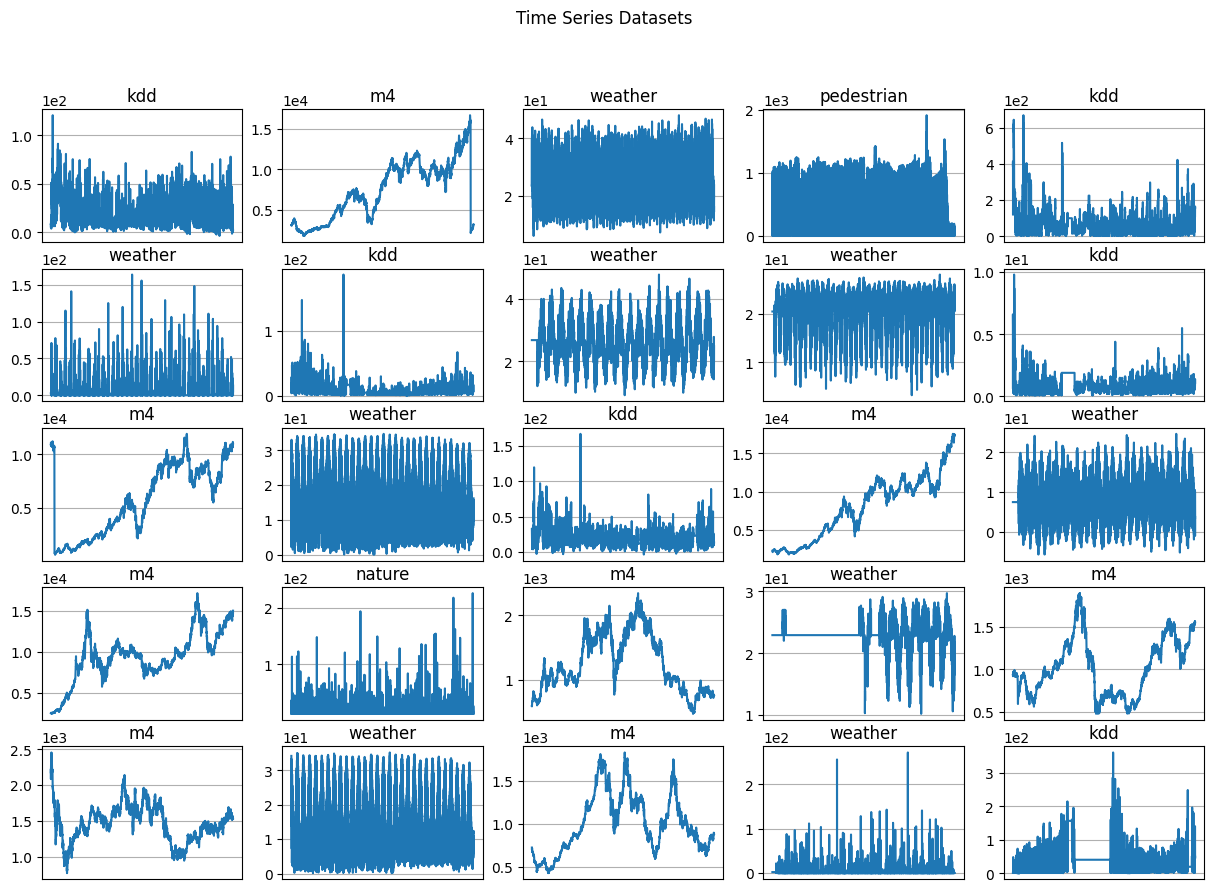

In [16]:
# plot raw observations
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

for idx, x in enumerate(subset):
    data = utils_tfb.read_data(x)

    ax = axs[idx % n_rows, idx // n_cols]
    ax.plot(data['channel_1'])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xticks([])
    ax.set_title(x.split('/')[-1].split('_')[0])
    ax.grid()

fig.suptitle("Time Series Datasets")

**Observations:**
We see that these time series are quite varied in (a) range of y-values, (b) their trend, seasonality, shifting, transition, stationarty. 

### Summarization

We will look at the following

- Descriptive statistics: Though unusual for time series, it still helps to see the range of values and variance in them.
- Rolling statistics: It's basically descriptive statistics but applied on a rolling basis to the time series. It gives the sense of mean and variability of the data temporally.

#### Descriptive Statistics

In [18]:
for idx, x in enumerate(subset):
    data = utils_tfb.read_data(x)
    print(x)
    print(data['channel_1'].describe())
    break

/teamspace/studios/this_studio/forecasting/kdd_cup_2018_dataset_without_missing_values_219.csv
count    10920.000000
mean        19.974313
std         14.097559
min         -3.800000
25%          9.500000
50%         16.000000
75%         27.100000
max        120.600000
Name: channel_1, dtype: float64


#### Rolling Statistics

While the difference with respect to the above visualization might not be visible, we will look at such visualization in the subsequent notebooks where we will be focusing on a single time series.

Text(0.5, 0.98, 'Rolling Mean Plots')

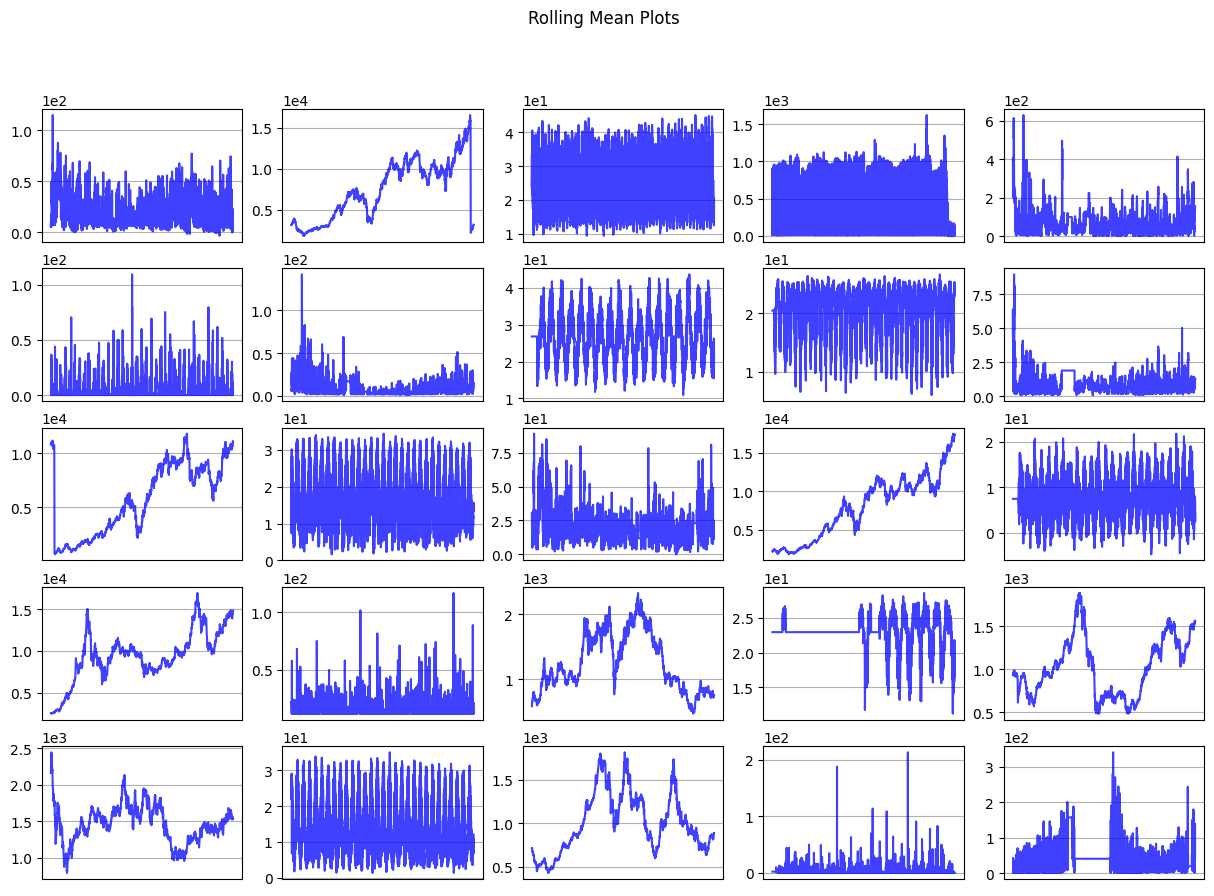

In [25]:
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

lags = np.arange(1, 15)
for idx, x in enumerate(subset):
    ax = axs[idx % n_rows, idx // n_cols]
    
    data = utils_tfb.read_data(x)
    rolling_mean = data['channel_1'].rolling(window=3).mean()
    ax.plot(rolling_mean, color='blue', alpha=0.75, linestyle='-')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.grid()

    ax.set_xticks([])

fig.suptitle("Rolling Mean Plots")

### Correlation Plots

These plots are crucial for identifying the type of model that we might want to use.

- Lag plot: A plot of observations at the current point and its lag. It gives a sense of dependency between the current observation and the previous observations. 
- Autocorrelation and Partial Autocorrelation (ACF, PACF): These plots help identifying the level of association (linear) between the observations at various lags. It is in essence a summarized version of lag plots at various lags.

#### Lag Plots

Text(0.5, 0.98, 'Lag Plots')

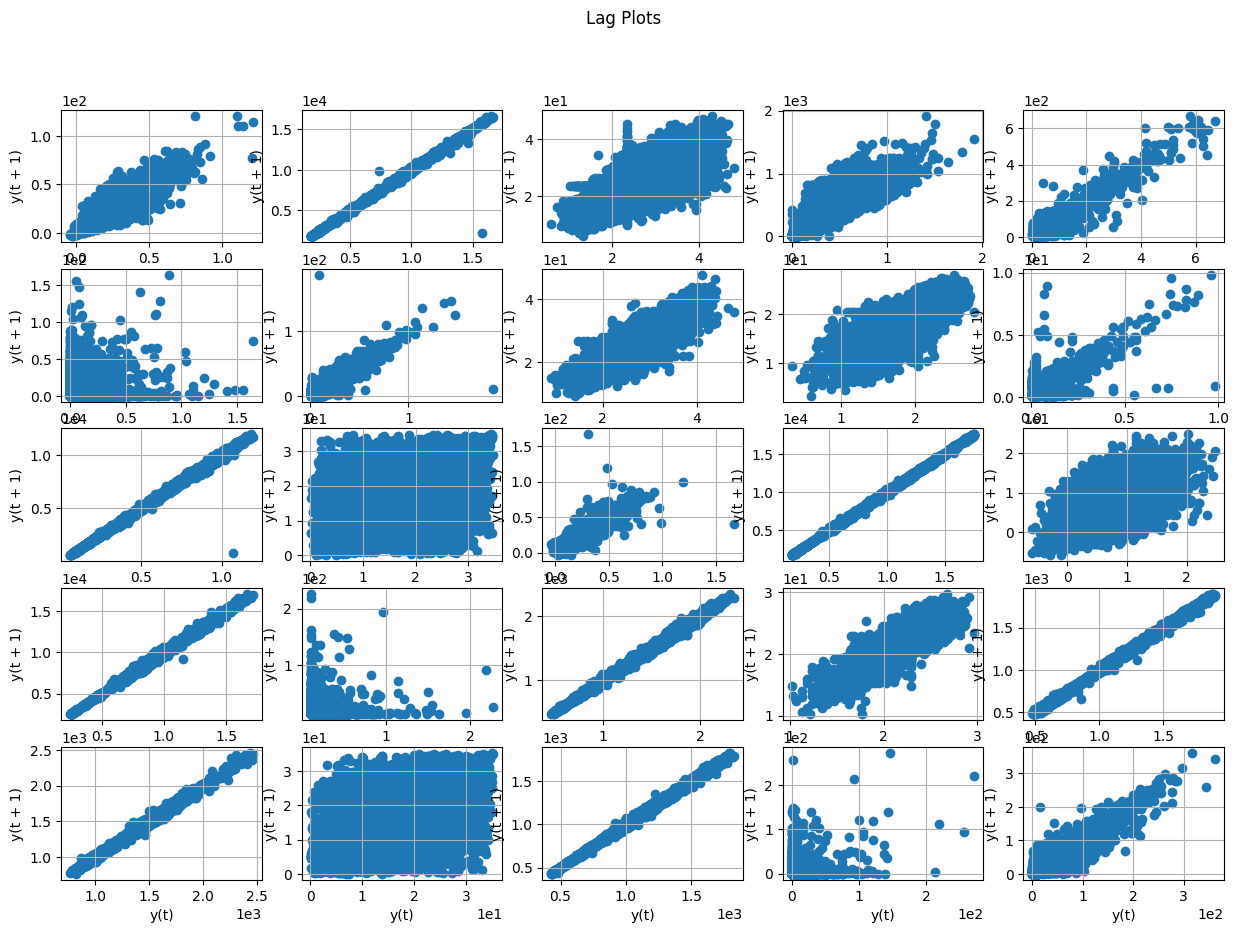

In [24]:
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

lags = np.arange(1, 15)
for idx, x in enumerate(subset):
    ax = axs[idx % n_rows, idx // n_cols]
    
    data = utils_tfb.read_data(x)
    pd.plotting.lag_plot(data['channel_1'], ax=ax)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

fig.suptitle("Lag Plots")

**Observations:** As we see, the correlation between the consecutive observation is not always one as one migh expect. There are time series where there seems to be no correlation at all. This might be an indication that there are other lags which are correlated with the current observation or the consecutive observations are related non-linearly to the previous observations. This intuition becomes important as we sketch out the modeling techniques for time series. 

### Autocorrelation

These plots tend to summarize the lag plots for various lags so that one can directly look at the correlation (a measure for linear association) between observation across various lags. 

Text(0.5, 0.98, 'Autocorrelation')

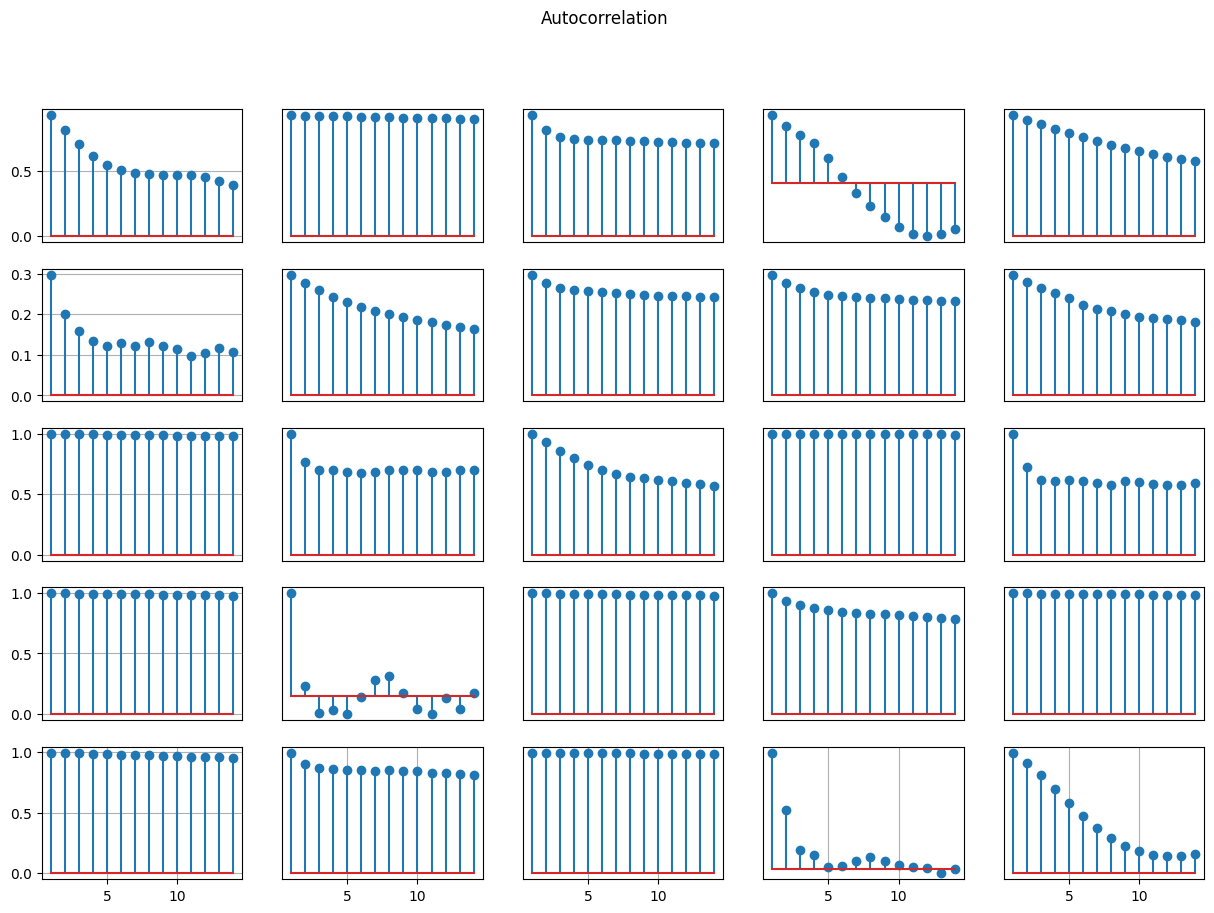

In [23]:
# Autocorrelations
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

lags = np.arange(1, 15)
for idx, x in enumerate(subset):
    ax = axs[idx % n_rows, idx // n_cols]
    
    data = utils_tfb.read_data(x)
    autocorrs = [data['channel_1'].autocorr(lag=lag) for lag in lags]
    ax.stem(lags, autocorrs)
    ax.grid()

    if idx // n_cols != 0:
        ax.set_yticks([])

    if idx % n_rows != n_rows-1:
        ax.set_xticks([])

fig.suptitle("Autocorrelation Plots")

**Observations:** One can build their intuition by gazing over the raw time series datasets, lag plots, and these autocorrelation plots. 

We see that there are datasets with strong dependencies across the lags as well as very weak dependencies too. 

### Partial Autocorrelation

Text(0.5, 0.98, 'Partial Autocorrelation Plots')

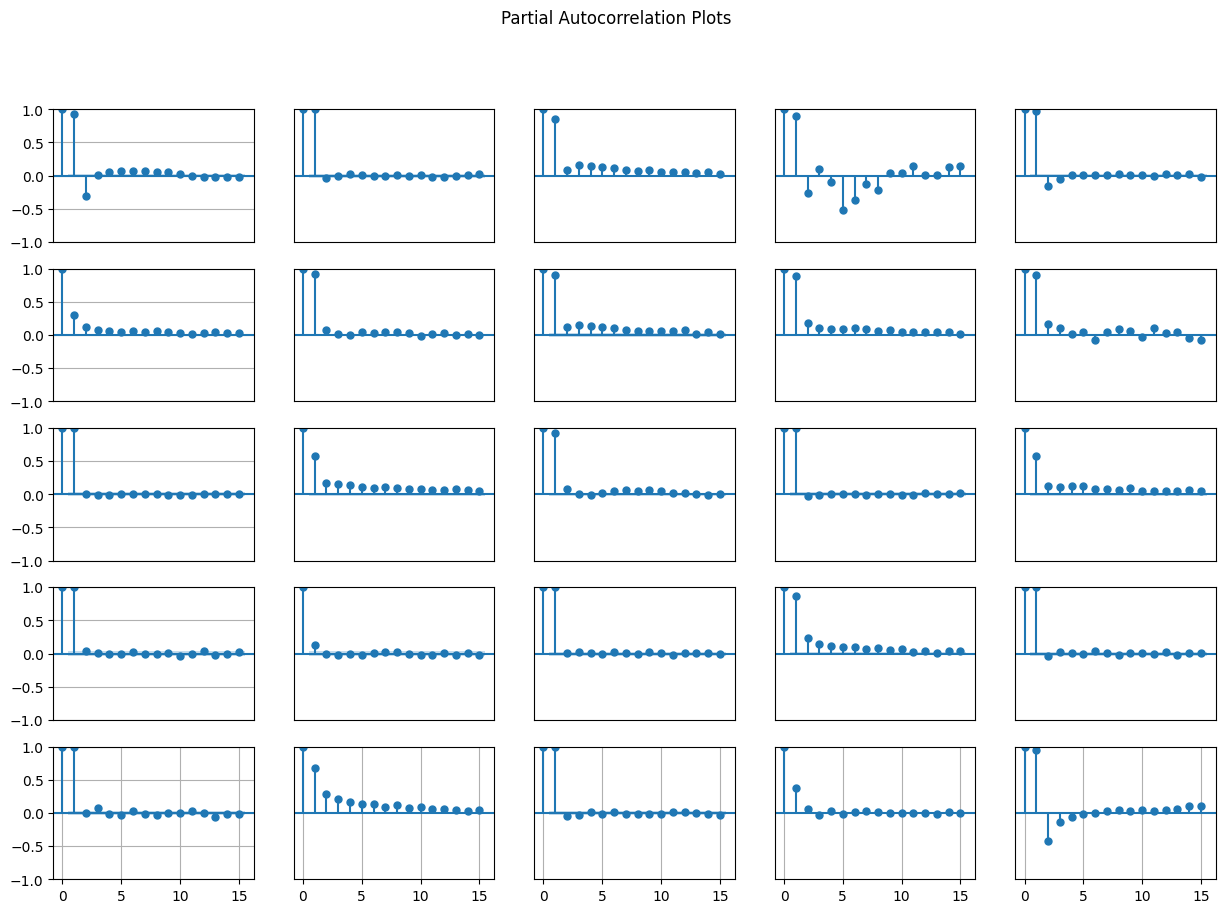

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

lags = np.arange(1, 15)
for idx, x in enumerate(subset):
    ax = axs[idx % n_rows, idx // n_cols]
    
    data = utils_tfb.read_data(x)

    plot_pacf(data['channel_1'], method='ywm', lags=15, ax=ax, title=None)
    ax.grid()

    if idx // n_cols != 0:
        ax.set_yticks([])

    if idx % n_rows != n_rows-1:
        ax.set_xticks([])

fig.suptitle("Partial Autocorrelation Plots")

**Observations:** We see a sharp decline in the correlation across the lags as the lag increases for most of the time series. This is where one reads the order of auto-regression modeling parameters, i.e, number of previous observations to include in the model. 

### Stationarity


A series is stationary if all of it's statistical properties remain constant over time (Strong stationarity). For weak stationarity, it needs to satisfy the following conditions:
- Constant Mean: The mean of the series doesn't change over time.
- Constant Variance: The variance of the series does not change over time, i.e., the series does not exhibit periods of high variability at one time and low variability at another
- Constant Covariance: The covariance of the i-th term and the (i+k)-th term should not depent on the time. This condition implies that the way series values are correlated with each other over intervals remains constant over time.

Stationarity is a common assumption behind traditional time series modeling approaches such as ARIMA and SARIMA.

There are several methods used to make time series stationary -- 
- Differencing: Subtract the previous observation from the current observation.
- Seasonal Differencing: Subtract the  observation from the same season in the previous cycle
- Transformation: Take logarithm, square root, of other transformations to stabilize the mean and varaince of the time series


In [29]:
# check stationarity 
from statsmodels.tsa.stattools import adfuller

def testStationarity(x, alpha=0.05):
    results = adfuller(x)
    pvalue = results[1]
    if pvalue < alpha:
        return 1, "Reject the null: the time series is stationary"
    else:
        return 0, "Accept the null: the time series is non-stationary"


stationarity = []
for data_file in subset:
    data = utils_tfb.read_data(data_file)
    stationarity.append(testStationarity(data['channel_1'])[0])


print(f"Number of stationary series in the subset: {sum(stationarity)}. Proportion: {sum(stationarity) / len(stationarity): 0.2f}")

Number of stationary series in the subset: 18. Proportion:  0.72


### Seasonality 


Now we look at Trend, Seasonality, Residuals of these time series.

A time series can be modeled by decomposing it into trend, seasonality, and residuals. The residuals, ideally, should be stationary and can be modeled separately. 

ARIMA is particularly designed to handle non-stationary time seies by incorporating differencing directly into the model. Seasonal ARIMA (SARIMA) can handle series with both non-stationarity and seasonality by using seasonal differencing. 

Moving beyond the stationary models, ML approaches can model non-stationry data effectively as they can capture non-linear relationships in data. 


Note: Since the datasets are missing information about the frequency, we will stcik to the ones that have frequency in their names explicitly. 




In [32]:
n_rows = 2
n_cols = 2

freq_datasets = [x for x in univariate_datasets if 'daily' in x]
subset = random.sample(freq_datasets, k= n_cols * n_rows)

Text(0.5, 0.98, 'Trend Seasonality Decomposition')

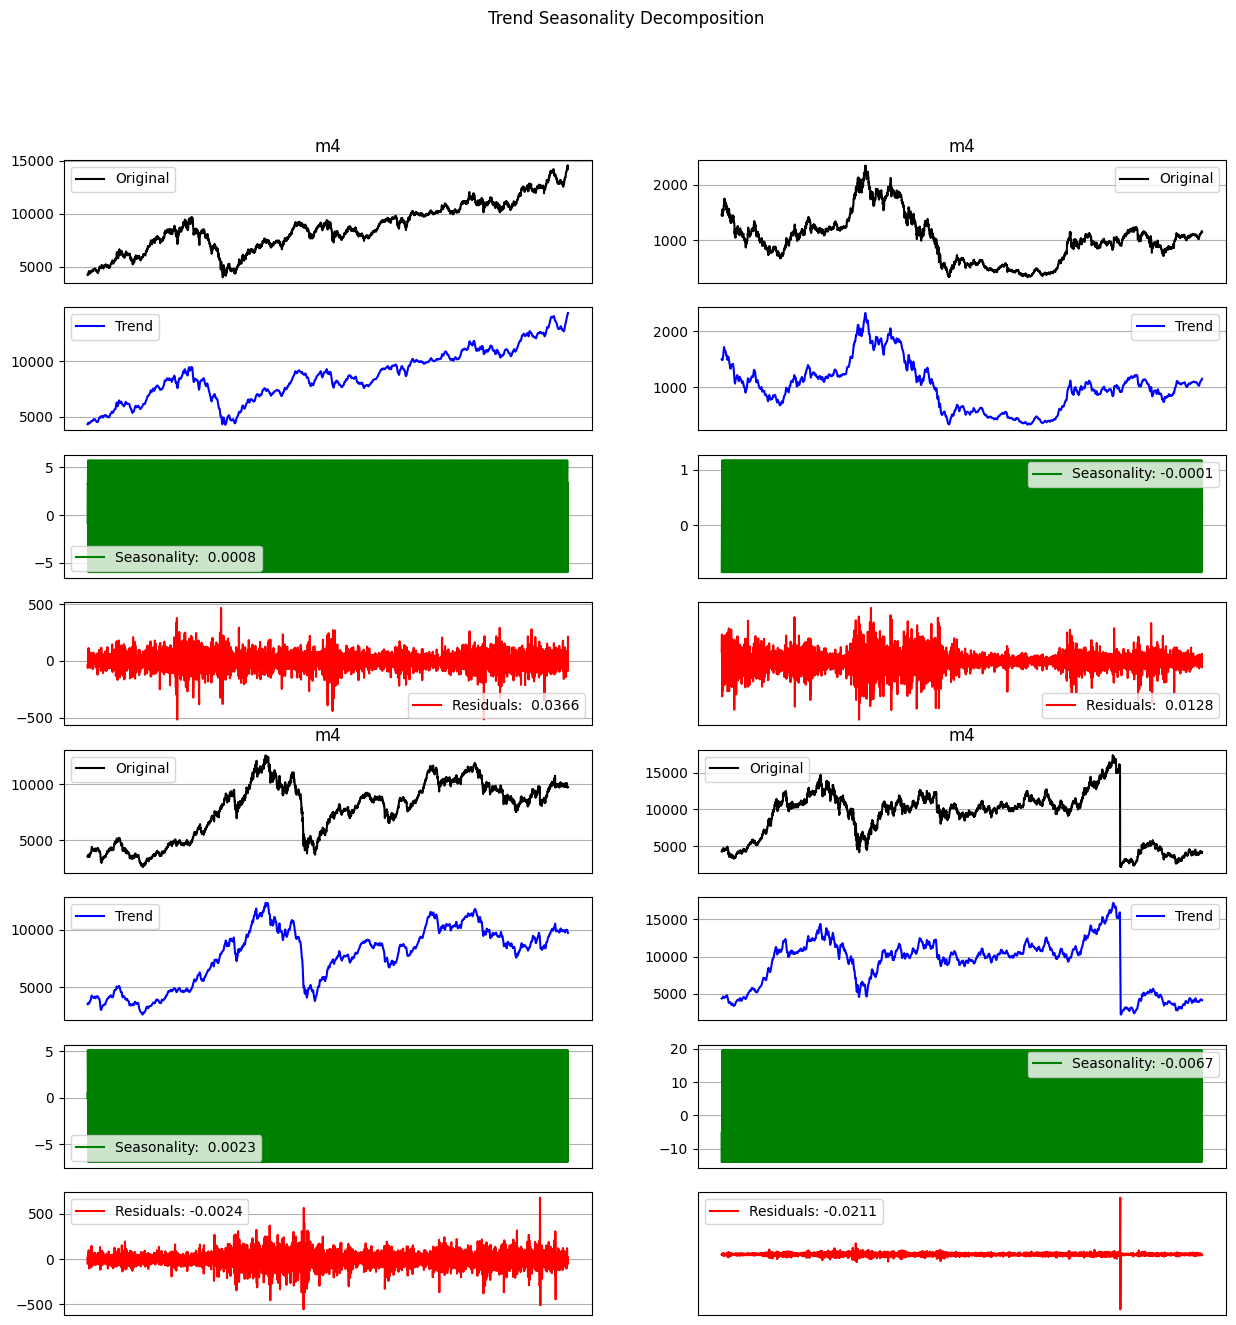

In [33]:
# Let's look at the seasoanlity, trend decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

fig, axs = plt.subplots(nrows=4*n_rows, ncols=n_cols, figsize=(15,15), dpi=100)

for idx, x in enumerate(subset):
    row_idx_plot = 4 * (idx % n_rows)
    col_idx_plot = idx // n_rows
    data = utils_tfb.read_data(x)
    
    # original series
    ax = axs[row_idx_plot, col_idx_plot]
    ax.plot(data.channel_1, color='black', label='Original')
    ax.legend()
    ax.grid()
    ax.set_xticks([])
    ax.set_title(x.split('/')[-1].split('_')[0])

    result = seasonal_decompose(data.channel_1, model="additive")

    # trend
    ax = axs[row_idx_plot + 1, col_idx_plot]
    ax.plot(result.trend, color='blue', label='Trend')
    ax.set_xticks([])
    ax.legend()
    ax.grid()

    # seasonality
    ax = axs[row_idx_plot + 2, col_idx_plot]
    ax.plot(result.seasonal, color="green", label=f'Seasonality: {result.seasonal.mean(): 0.4f}')
    ax.legend()
    ax.set_xticks([])
    ax.grid()

    # residual
    ax = axs[row_idx_plot + 3, col_idx_plot]
    ax.plot(result.resid, color="red", label=f'Residuals: {result.resid.mean(): 0.4f}')
    ax.legend()
    ax.set_xticks([])
    ax.grid()

    if idx // n_cols != 0:
        ax.set_yticks([])

    if idx % n_rows != n_rows-1:
        ax.set_xticks([])

fig.suptitle("Trend Seasonality Decomposition")

**Observations:** We break each time series into its components: Trend, Seasonality, and Residuals. As a result, there are four plots per time series - one corresponding to the original time series and the rest about it components. 


#### Frequency Analysis

More deeper look into seasonality. Perform spectral analysis to identify any hidden periodicities. A fourier transform can help identify dominant cycles in the data even if they aren't apparent visually. 

Text(0.5, 0.98, 'Power spectrum')

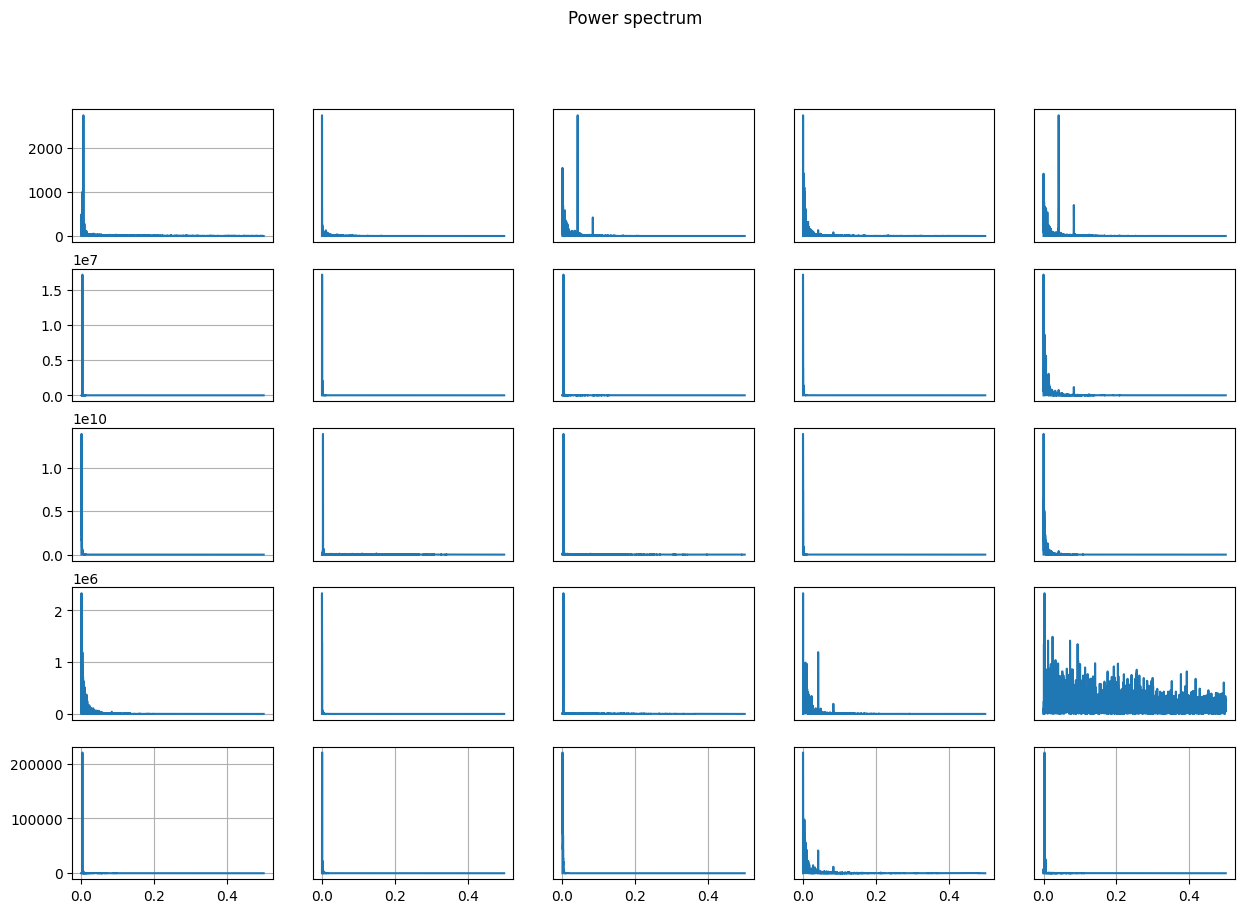

In [174]:
from scipy.signal import periodogram

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), dpi=100)

for idx, x in enumerate(subset):
    ax = axs[idx % n_rows, idx // n_cols]
    
    data = utils.read_data(x)
    freqs, power = periodogram(data.channel_1.values)
    ax.stem(freqs, power)
    ax.grid()

    if idx // n_cols != 0:
        ax.set_yticks([])

    if idx % n_rows != n_rows-1:
        ax.set_xticks([])

fig.suptitle("Power spectrum")

## Next Steps

1. More data analysis (Optional): Let's look at a single univariate dataset and do the similar analysis as above on it.
2. Head over to 01.4_gluonts_datasets.ipynb to learn about a library that we will use to build advanced forecasting methods.

In [134]:
x = utils.read_data('/Users/gupta/Workspace/tutorials/time_series/forecasting/Traffic.csv')

In [138]:
x.columns

Index(['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_8', 'channel_9', 'channel_10',
       ...
       'channel_853', 'channel_854', 'channel_855', 'channel_856',
       'channel_857', 'channel_858', 'channel_859', 'channel_860',
       'channel_861', 'channel_862'],
      dtype='object', length=862)

We see that these time series are quite varied in (a) range of y-values, (b) their trend, seasonality, shifting, transition, stationarty. 


From: https://huggingface.co/blog/autoformer
Secondly, multivariate models are typically worse than the univariate ones, the reason being the difficulty in estimating the cross-series correlations/relationships. The additional variance added by the estimates often harms the resulting forecasts or the model learns spurious correlations. Recent papers like CrossFormer (ICLR 23) and CARD try to address this problem in Transformer models. Multivariate models usually perform well when trained on large amounts of data. However, when compared to univariate models, especially on smaller open datasets, the univariate models tend to provide better metrics. By comparing the linear model with equivalent-sized univariate transformers or in fact any other neural univariate model, one will typically get better performance.